# Random Forest for Credit Card Fraud Detection

This notebook implements a Random Forest model for detecting credit card fraud.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('../data/credit_card_fraud_dataset.csv')
test_df = pd.read_csv('../data/credit_card_fraud_test.csv')

# Prepare data
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud'].map({'Legitimate': 0, 'Fraud': 1})
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud'].map({'Legitimate': 0, 'Fraud': 1})

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)


Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


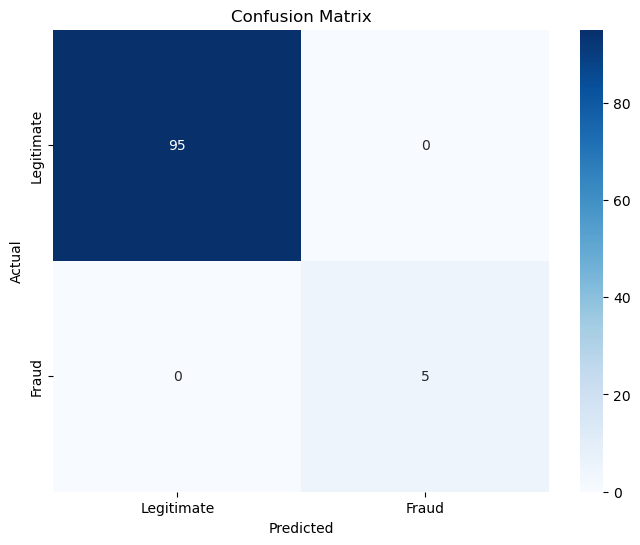


Model saved to model/random_forest.joblib


In [3]:
import os
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=0),
    'Recall': recall_score(y_test, y_pred, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred, zero_division=0),
}

if y_pred_proba is not None:
    metrics['AUC-ROC'] = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model
os.makedirs('../model', exist_ok=True)
joblib.dump(model, f'../model/random_forest.joblib')
print(f"\nModel saved to model/random_forest.joblib")